<h2 style="color:brown" align="center">Handwritten Digits Classification using Neural Network</h2>

In this notebook we will classify handwritten digits using a simple neural network which has only input and output layers. We will then add a hidden layer and see how the performance of the model improves.

In [59]:
# run 'pip install tensorflow' at anaconda prompt to install it for the first time
# to install tensorflow successfully you should have either one of the python 
# or anaconda installations, not both.
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [60]:
# loading hand written digits dataset from keras library
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

In [61]:
X_train.shape   # 60000 handwritten digit image samples with dimension 28x28

(60000, 28, 28)

In [62]:
X_test.shape    # 10000 handwritten digit image samples with dimension 28x28

(10000, 28, 28)

In [63]:
X_train[0].shape

(28, 28)

In [64]:
X_train[0]    # it is displaying 2D array like this

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

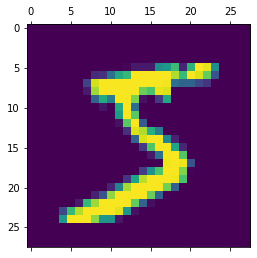

In [65]:
plt.matshow(X_train[0])    # printing the image

In [66]:
y_train[0]    # printing digit in number

5

In [67]:
y_train[:5]    # printing the first 5 digits

array([5, 0, 4, 1, 9], dtype=uint8)

In [68]:
# normalizing the training and test data. Scaling will improve the efficiency of a model
# after scaling values will range from 0 to 1
X_train = X_train / 255
X_test = X_test / 255

In [69]:
X_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [70]:
print (X_train.shape)
X_train_flattened = X_train.reshape(len(X_train), 28*28)
print (X_train_flattened.shape)

(60000, 28, 28)
(60000, 784)


In [71]:
print (X_test.shape)
X_test_flattened = X_test.reshape(len(X_test), 28*28)
print (X_test_flattened.shape)

(10000, 28, 28)
(10000, 784)


In [72]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

<h3 style='color:purple'>Very simple neural network with no hidden layers</h3>

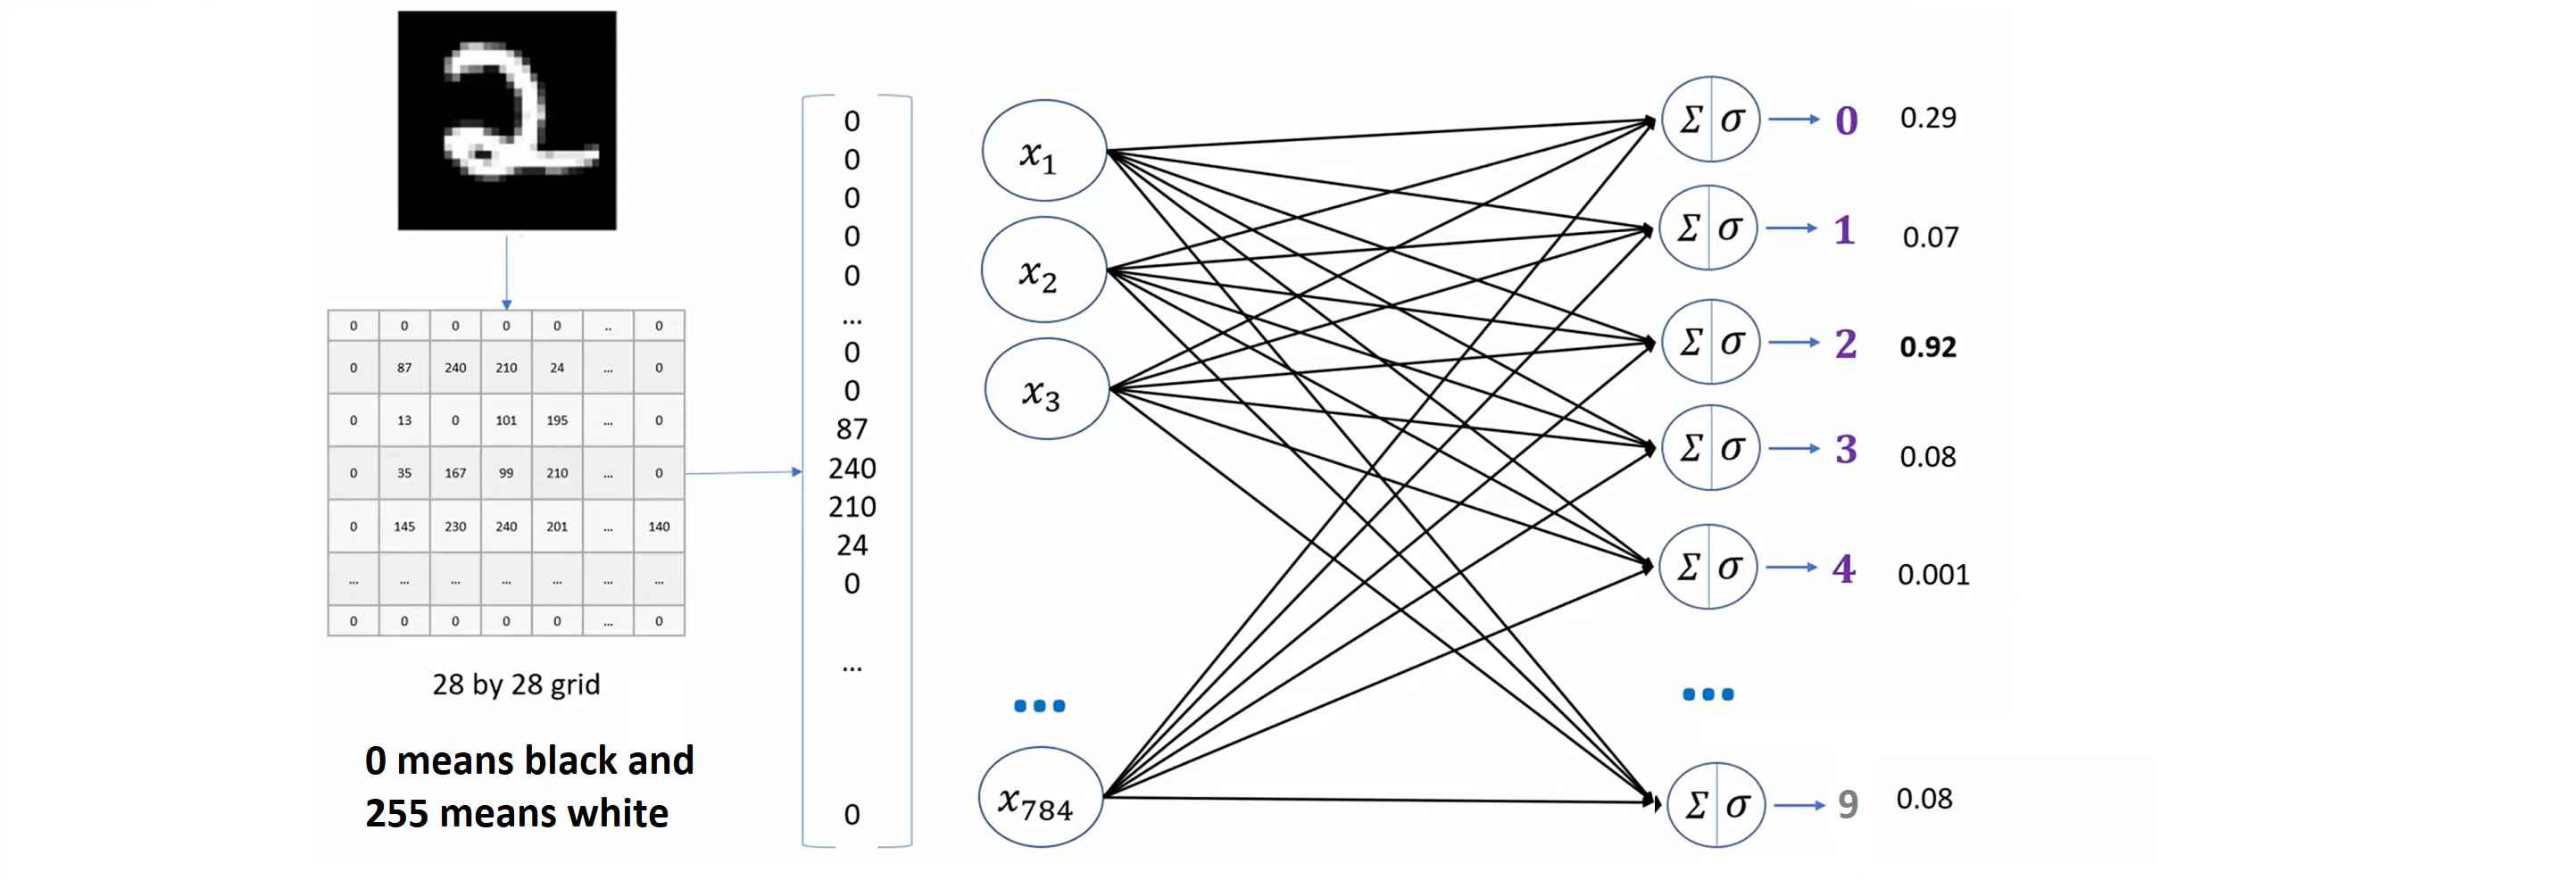

In [73]:
model = keras.Sequential([  # Sequential means we are having a stack of layers in the neural network
                            # There are three ways of creating a model in tf.keras: Sequential API , 
                            # Functional API, and Model subclassing.
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')  
    # as it is a stack so it will accept every layer as one element
    # dense means all the neurons in one layer are connected with all the neurons in the next layer
    # output layer shape is 10 and input layer shape is 784 with activation function as sigmoid
])

model.compile(optimizer='adam', # optimizer will allow to avail global optima in an efficient way
              loss='sparse_categorical_crossentropy',  # Computes the crossentropy loss between 
                                                       # the labels and predictions
              metrics=['accuracy'])                    # Calculates how often predictions equal labels
 
# Optimizer: An optimizer is a function or an algorithm that modifies the attributes of the neural network,
# such as weights and learning rate. Thus, it helps in reducing the overall loss and improve the accuracy. 
# Popular optimizers are: GD, SGD, SGD with momentum, MBGD, Adagrad, RMSProp, AdaDelta, Adam

model.fit(X_train_flattened, y_train, epochs=5)        # getting the model trained

Epoch 1/5
1875/1875 [==============================] - 2s 734us/step - loss: 0.4659 - accuracy: 0.8806
Epoch 2/5
1875/1875 [==============================] - 1s 699us/step - loss: 0.3036 - accuracy: 0.9152
Epoch 3/5
1875/1875 [==============================] - 1s 668us/step - loss: 0.2835 - accuracy: 0.9208
Epoch 4/5
1875/1875 [==============================] - 1s 632us/step - loss: 0.2730 - accuracy: 0.9236
Epoch 5/5
1875/1875 [==============================] - 1s 694us/step - loss: 0.2664 - accuracy: 0.9259


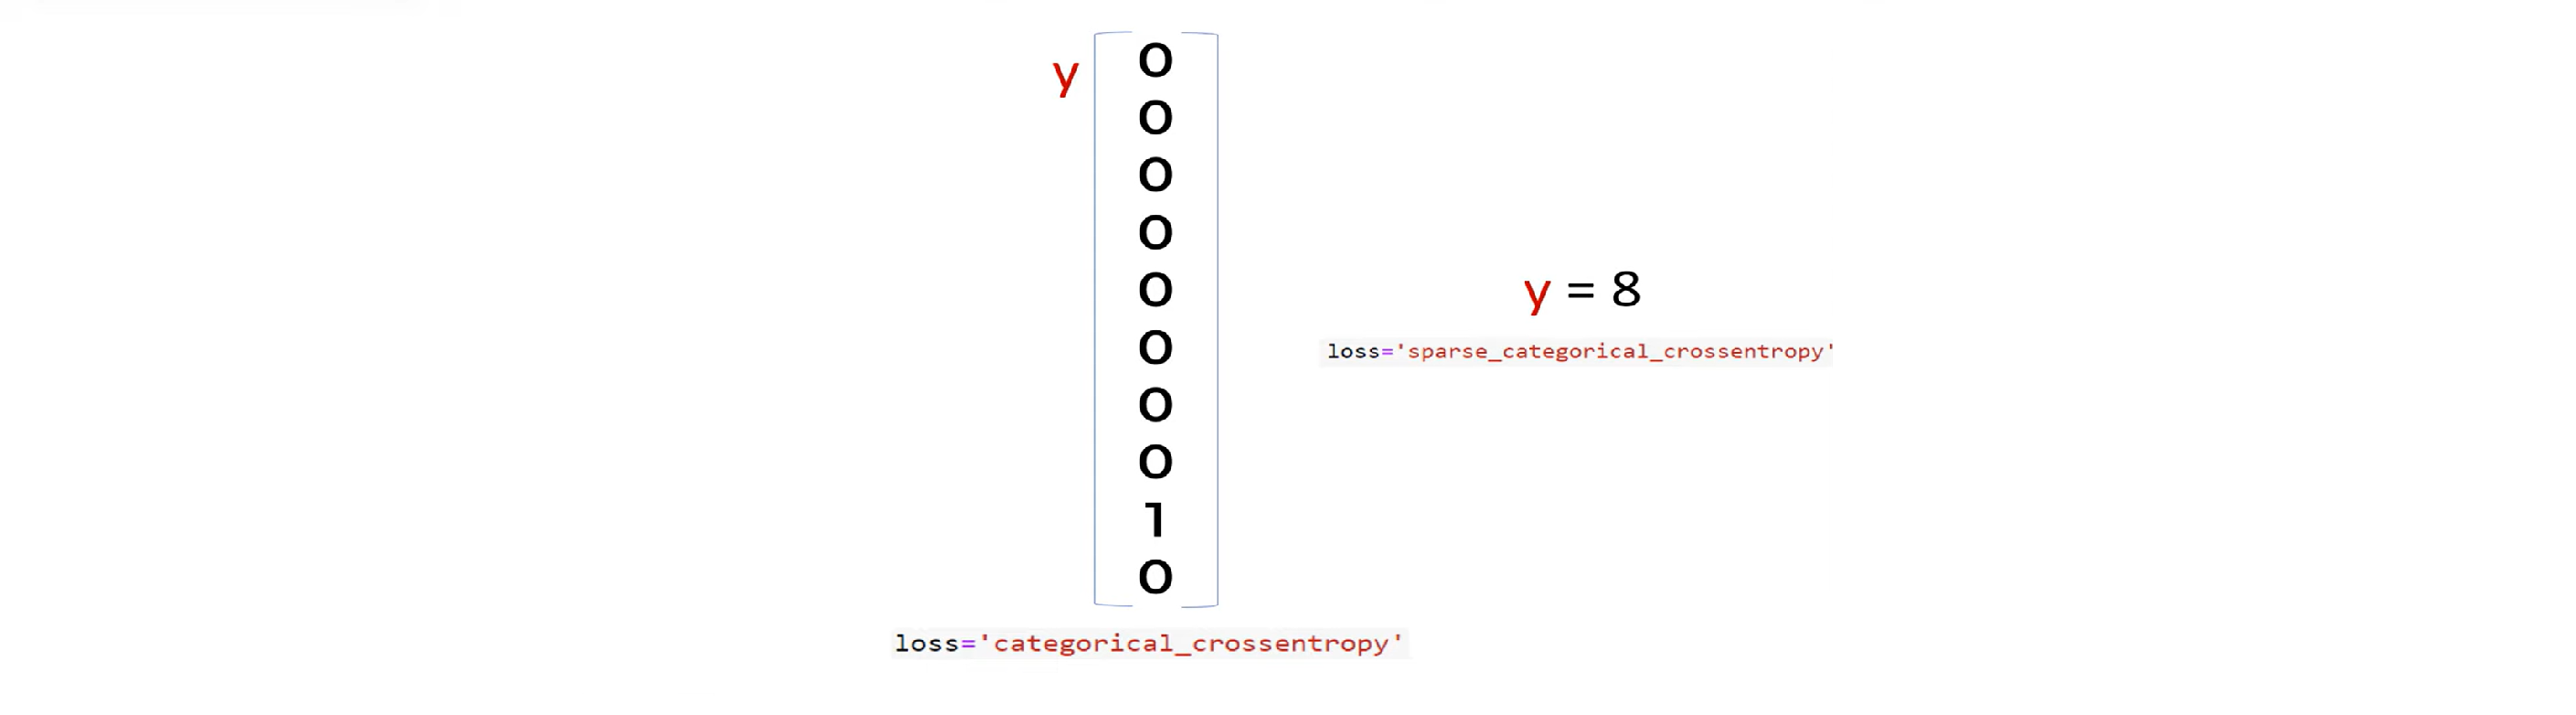

In [74]:
model.evaluate(X_test_flattened, y_test)    # evaluating the performance of the model

313/313 [==============================] - 0s 600us/step - loss: 0.2687 - accuracy: 0.9251


[0.2687184810638428, 0.9251000285148621]

In [75]:
y_predicted = model.predict(X_test_flattened)
y_predicted[0]   # printing all 10 probability values of the first digit

array([2.9853374e-02, 2.4969830e-07, 5.7918757e-02, 9.5627201e-01,
       2.2685230e-03, 9.4838500e-02, 1.1728079e-06, 9.9975967e-01,
       1.0753998e-01, 6.2150764e-01], dtype=float32)

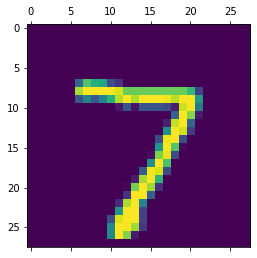

In [76]:
plt.matshow(X_test[0])    # the first sample was digit 7

**np.argmax finds a maximum element  from an array and returns the index of it**

In [77]:
np.argmax(y_predicted[0])    # printing the index of the highest probability value which is 7
                             # so the model could do the right prediction for the first digit

7

In [78]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]   # printing labels of the images

In [79]:
y_predicted_labels[:5]

[7, 2, 1, 0, 4]

In [80]:
y_test[:5]    # first 5 predicted labels are matching with the first 5 labels

array([7, 2, 1, 0, 4], dtype=uint8)

In [81]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)  # printing the confusion matrix
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 965,    0,    1,    1,    0,    4,    4,    4,    1,    0],
       [   0, 1112,    4,    2,    0,    1,    3,    2,   11,    0],
       [   6,    8,  921,   18,    6,    3,   10,   12,   45,    3],
       [   3,    0,   19,  914,    0,   26,    2,   11,   29,    6],
       [   1,    1,    5,    2,  914,    0,    9,    5,    9,   36],
       [  10,    2,    4,   28,    9,  776,   10,    7,   39,    7],
       [  12,    3,   10,    1,    7,   13,  908,    2,    2,    0],
       [   1,    5,   24,    6,    5,    0,    0,  953,    2,   32],
       [   7,    8,    6,   17,    9,   25,    8,   12,  877,    5],
       [  10,    7,    1,    8,   27,    6,    0,   28,   11,  911]])>

Text(69.0, 0.5, 'Truth')

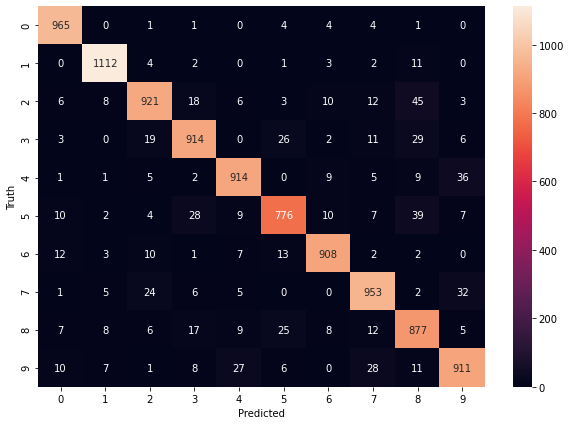

In [82]:
# displaying confusion matrix in a visualization
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # fmt: String formatting code to use when adding annotations (Optional)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using hidden layer</h3>

In [83]:
# now we shall add one hidden layer in this model
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'), # this is a hidden layer
    keras.layers.Dense(10, activation='sigmoid')  # this is output layer
])

model.compile(optimizer='adam', # optimizer will allow to avail global optima in an efficient way
              loss='sparse_categorical_crossentropy',  # Computes the crossentropy loss between 
                                                       # the labels and predictions
              metrics=['accuracy'])                    # Calculates how often predictions equal labels
 

model.fit(X_train_flattened, y_train, epochs=5)        # getting the model trained

Epoch 1/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.2763 - accuracy: 0.9213
Epoch 2/5
1875/1875 [==============================] - 2s 814us/step - loss: 0.1258 - accuracy: 0.9622
Epoch 3/5
1875/1875 [==============================] - 1s 773us/step - loss: 0.0869 - accuracy: 0.9740
Epoch 4/5
1875/1875 [==============================] - 1s 750us/step - loss: 0.0659 - accuracy: 0.9803
Epoch 5/5
1875/1875 [==============================] - 1s 780us/step - loss: 0.0517 - accuracy: 0.9840


In [84]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0839 - accuracy: 0.9733


[0.08386213332414627, 0.9732999801635742]

Text(69.0, 0.5, 'Truth')

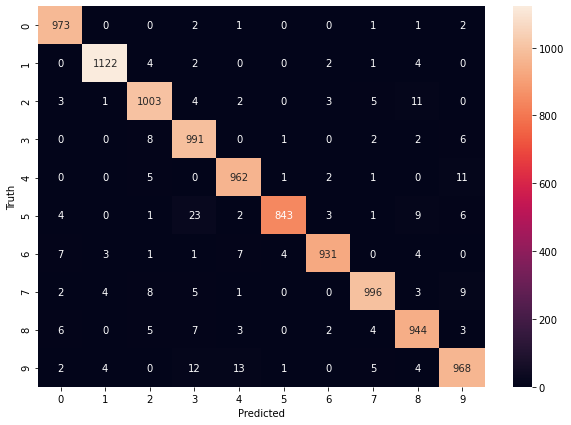

In [85]:
# displaying confusion matrix in a visualization
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d') # fmt: String formatting code to use when adding annotations (Optional)
plt.xlabel('Predicted')
plt.ylabel('Truth')

<h3 style='color:purple'>Using Flatten layer so that we don't have to call .reshape on input dataset</h3>

In [86]:
# keras has the option to make the input array flattened. So we need not to do the flatten outside
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 2s 750us/step - loss: 0.2729 - accuracy: 0.9228
Epoch 2/10
1875/1875 [==============================] - 1s 750us/step - loss: 0.1242 - accuracy: 0.9639
Epoch 3/10
1875/1875 [==============================] - 2s 863us/step - loss: 0.0860 - accuracy: 0.9740
Epoch 4/10
1875/1875 [==============================] - 1s 785us/step - loss: 0.0648 - accuracy: 0.9800
Epoch 5/10
1875/1875 [==============================] - 1s 792us/step - loss: 0.0505 - accuracy: 0.9841
Epoch 6/10
1875/1875 [==============================] - 2s 817us/step - loss: 0.0414 - accuracy: 0.9872
Epoch 7/10
1875/1875 [==============================] - 1s 769us/step - loss: 0.0329 - accuracy: 0.9897
Epoch 8/10
1875/1875 [==============================] - 1s 767us/step - loss: 0.0268 - accuracy: 0.9914
Epoch 9/10
1875/1875 [==============================] - 1s 756us/step - loss: 0.0229 - accuracy: 0.9928
Epoch 10/10
1875/1875 [==============================] - 1s 752u

In [87]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0798 - accuracy: 0.9783


[0.07980697602033615, 0.9782999753952026]